# AirBnb Price Prediction Project

### 1. Introduction

FairBnB is our imaginary AirBnb property management company. It helps customers renting out their properties at the correct price, managing customers, and offers cleaning services. FairBnb has to precisely judge what type of properties to take on and what price point to rent out the propeties at, and consider what is their break-even point for each property considering FairBnb's expenses.

To help make all these business decisions FairBnb has decided to explore AirBnb's listing data for properties in the city of London. FairBnb would like to automate the price prediction, by creating a model which would take all necessary factors into a consideration.

To create the model, FairBnb first has to prepare and analyze the data, to see possible correlations between different factors.

Note: Originally this project was done in R and on this nootebook I used python to recreate what we have done in R.

### 1.1. The Dataset

We found the dataset on AirBnB's website: http://insideairbnb.com/get-the-data.html and chose the detailed listings dataset for London. It contains all information about each listing that is available for rent.

In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
#import the dataset
df = pd.read_csv("listings.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75506 entries, 0 to 75505
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                75506 non-null  int64  
 1   listing_url                       75506 non-null  object 
 2   scrape_id                         75506 non-null  int64  
 3   last_scraped                      75506 non-null  object 
 4   name                              75476 non-null  object 
 5   summary                           72579 non-null  object 
 6   space                             51140 non-null  object 
 7   description                       74474 non-null  object 
 8   experiences_offered               75506 non-null  object 
 9   neighborhood_overview             45427 non-null  object 
 10  notes                             29793 non-null  object 
 11  transit                           45749 non-null  object 
 12  acce

### 2. Data Cleaning

From the feature list above we can see that have 96 features and that there are many features that we do not need. There are also some features that have the wrong data type.
We have made some assumptions regarding what columns we might require and have selected only those. We think these properties are the most crucial for the pricing of a listing. 

In [4]:
# Selecting all the columns needed 
cols = ["id","host_id","host_response_time","host_response_rate","neighbourhood_cleansed",
                     "property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type",
                     "square_feet","price","security_deposit","cleaning_fee","extra_people","minimum_nights","maximum_nights",
                     "number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness",
                     "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
                     "instant_bookable","cancellation_policy","host_since"]
Listings = df[cols]

In [5]:
pd.set_option('display.max_columns', None)
Listings.head()

,id,host_id,host_response_time,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,host_since
0,9554,31655,within an hour,100%,Haringey,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,NaN,$35.00,NaN,$7.00,$15.00,1,730,133,97.0,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,2009-08-14
1,11076,40471,within an hour,100%,Ealing,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,NaN,$70.00,NaN,NaN,$35.00,2,1125,2,90.0,8.0,9.0,10.0,9.0,9.0,9.0,t,strict_14_with_grace_period,2009-09-22
2,13913,54730,within a few hours,70%,Islington,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,538.0,$45.00,$100.00,$15.00,$17.00,1,29,14,95.0,9.0,10.0,9.0,10.0,9.0,9.0,f,moderate,2009-11-16
3,17402,67564,within an hour,100%,Westminster,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,$300.00,$350.00,$65.00,$10.00,3,365,35,93.0,10.0,9.0,9.0,9.0,10.0,9.0,f,strict_14_with_grace_period,2010-01-04
4,24328,41759,within a few hours,100%,Wandsworth,Townhouse,Entire home/apt,4,1.5,2.0,2.0,Real Bed,1001.0,$150.00,$250.00,$70.00,$15.00,30,90,92,98.0,10.0,10.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,2009-09-28


In [6]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75506 entries, 0 to 75505
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           75506 non-null  int64  
 1   host_id                      75506 non-null  int64  
 2   host_response_time           54978 non-null  object 
 3   host_response_rate           54978 non-null  object 
 4   neighbourhood_cleansed       75506 non-null  object 
 5   property_type                75506 non-null  object 
 6   room_type                    75506 non-null  object 
 7   accommodates                 75506 non-null  int64  
 8   bathrooms                    75313 non-null  float64
 9   bedrooms                     75444 non-null  float64
 10  beds                         75336 non-null  float64
 11  bed_type                     75506 non-null  object 
 12  square_feet                  483 non-null    float64
 13  price           

In [7]:
#First coping the data frame and replacing some regex found in the dataset
Listings= Listings.copy()
cols = ['price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate']
Listings[cols] = Listings[cols].replace({'\\$': '', ',': '', ',':'', '%':''}, regex=True)

In [8]:
#Changing a datatype of features to numeric
Listings[['price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate']] = Listings[['price', 'security_deposit',
                                                    'cleaning_fee', 'extra_people', 'host_response_rate']].apply(pd.to_numeric)

In [9]:
#Cheaking na values 
Listings.isna().sum()

id                                 0
host_id                            0
host_response_time             20528
host_response_rate             20528
neighbourhood_cleansed             0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        193
bedrooms                          62
beds                             170
bed_type                           0
square_feet                    75023
price                              0
security_deposit               28679
cleaning_fee                   21747
extra_people                       0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating           21649
review_scores_accuracy         21718
review_scores_cleanliness      21700
review_scores_checkin          21785
review_scores_communication    21713
review_scores_location         21790
review_scores_value            21795
i

In [10]:
# Set NA values to 0. This might have a bad impact on our models since the values that are missing are unlikely to be 0. 
# We had to do it since there was very few listings without any NA values.
na_cols = Listings.columns[Listings.isna().any()].tolist()
Listings[na_cols] = Listings[na_cols].replace(np.nan, 0)   

In [11]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75506 entries, 0 to 75505
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           75506 non-null  int64  
 1   host_id                      75506 non-null  int64  
 2   host_response_time           75506 non-null  object 
 3   host_response_rate           75506 non-null  float64
 4   neighbourhood_cleansed       75506 non-null  object 
 5   property_type                75506 non-null  object 
 6   room_type                    75506 non-null  object 
 7   accommodates                 75506 non-null  int64  
 8   bathrooms                    75506 non-null  float64
 9   bedrooms                     75506 non-null  float64
 10  beds                         75506 non-null  float64
 11  bed_type                     75506 non-null  object 
 12  square_feet                  75506 non-null  float64
 13  price           

### 3. Exploratory data analysis(EDA)

After cleaning process the dataset is significantly simplified and we can begin our data exploration and analysis.
In this part we will explore some of the different properties to find possible correlations

#### 3.1 Room Types

Lets first take a look at what type of rooms are being rented out the most.

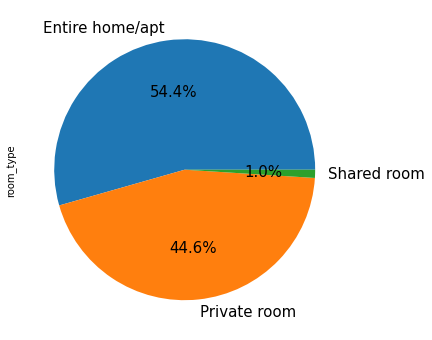

In [12]:
Listings['room_type'].value_counts().plot.pie(figsize=(6, 6), autopct="%.1f%%", fontsize=15)

#### 3.1.1 Room types compared to price

Text(0.5, 1.0, 'Room type to average price per night')

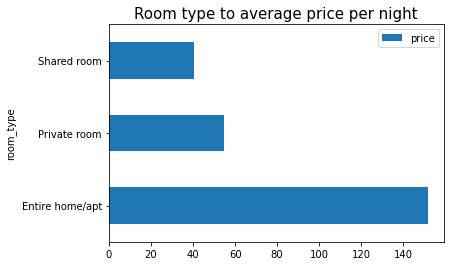

In [13]:
room_type_price = Listings.groupby('room_type').agg({'price':'mean'})
room_type_price.plot(kind='barh')
plt.title('Room type to average price per night', fontsize=15)

#### 3.2 Number of bedrooms

Next lets take a look at what number of listings offer what number of bedrooms

Text(0.5, 1.0, 'Number of bedrooms offered')

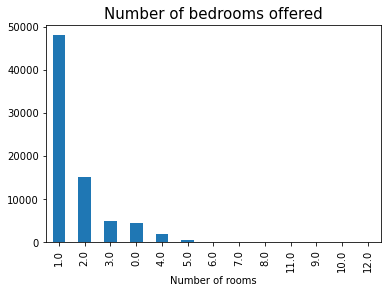

In [14]:
bedroom_counts = Listings['bedrooms'].value_counts()
bedroom_counts.plot(kind='bar')
plt.xlabel('Number of rooms')
plt.title('Number of bedrooms offered', fontsize=15)

#### 3.2.1 Number of bedrooms compared to price

Lets see how much of an impact the number of bedrooms have on the price.

Text(0.5, 1.0, 'Bedroom to average price per night')

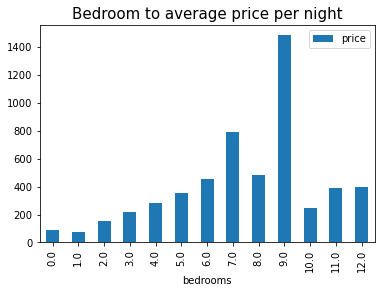

In [15]:
bedrooms_price = Listings.groupby('bedrooms').agg({'price':'mean'})
bedrooms_price.plot(kind='bar')
plt.title('Bedroom to average price per night', fontsize=15)

We can see how much the price increases as the number of beds increases. From 0 (sofa) to 7 beds the price is increasing but afterwards the price becomes very varying. We think other factors comes in play afterwards.

#### 3.3 Neighborhood

Let us see how many listings are in which neighborhood, and how the neighborhood influences the price.

Text(0.5, 1.0, 'Number of listings in a neighborhood')

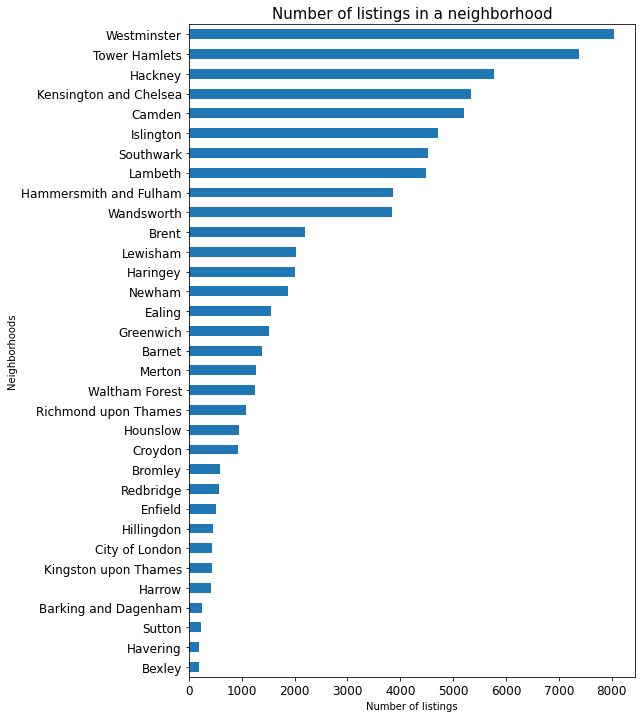

In [16]:
neighbourhood = Listings['neighbourhood_cleansed'].value_counts()
plt.rcParams['figure.figsize']=(8, 12)
neighbourhood.plot(kind='barh')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()
plt.xlabel('Number of listings')
plt.ylabel('Neighborhoods')
plt.title('Number of listings in a neighborhood', fontsize=15)

We can see that the majority of listings are in Westminster and Tower Hamlets, with other neighborhoods being fairly far behind by a few thousand listings.


#### 3.3.1 Neighborhood to price

Let's investigate how the neighborhood influences the price.

Text(0.5, 1.0, 'Neighborhood to average price per night')

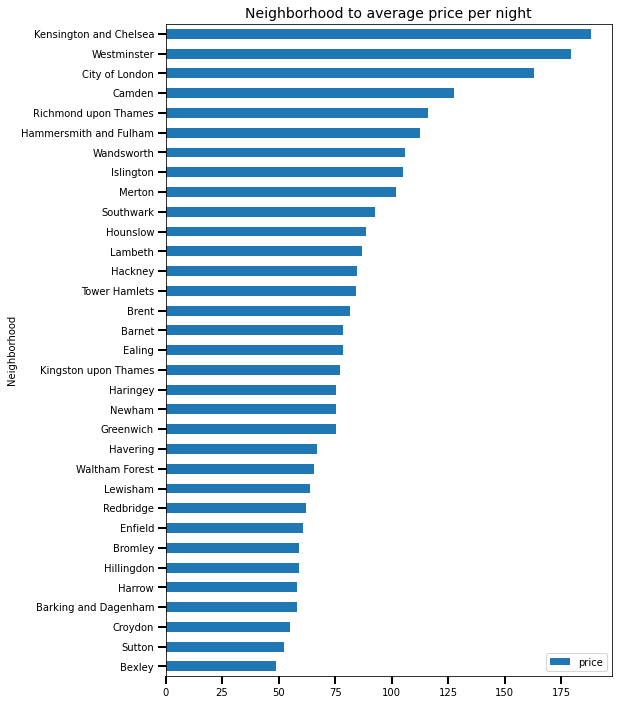

In [17]:
neighborhood_price = Listings.groupby('neighbourhood_cleansed').agg({'price':'mean'}).sort_values('price')
neighborhood_price.plot(kind='barh')
plt.tick_params(direction='out', length=8, width=2, grid_color='g', grid_alpha=0.5)
plt.ylabel('Average price per night in $')
plt.ylabel('Neighborhood')
plt.title('Neighborhood to average price per night', fontsize=14)

We can see that the three most expensive neighborhoods are Kensington and Chelsea and Westminster being at the top with nightly rent well over $200.

City of London is a somewhat close 3rd with average $170 per night.
One observation we can make is that Westminster is one of the most available neighborhoods with the largest amount of listings, however it is also second most expensive

#### 3.3.2 Neighborhood to square feet

Another correlation that might be worth investigating is between the property size the neighborhood. With it we can find out what is the average size of the property in a specific neighborhood, and thus whether our customer has an above average, average or below average property size than the competition.

Text(0.5, 1.0, 'Neighborhood to Square feet')

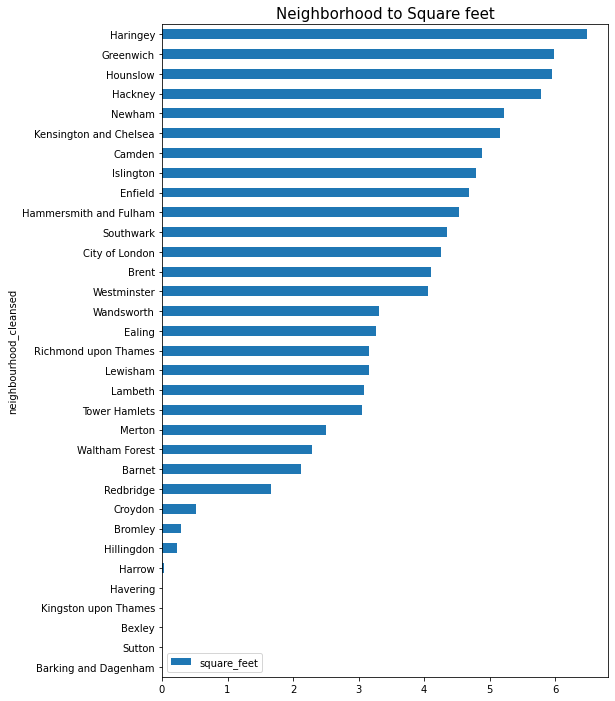

In [18]:
neighborhood_squarefeet = Listings.groupby('neighbourhood_cleansed').agg({'square_feet':'mean'}).sort_values('square_feet')
neighborhood_squarefeet.plot(kind='barh')
plt.title('Neighborhood to Square feet', fontsize=15)

Unfortunately, since the dataset does not actually contain many observations with valid square_feet value, we cannot really draw many conclusions from this correlations.

## 4. Modeling

### 4.1 Linear regression

The main goal of our project is to be able to predict listing prices based on features that we input. We threfore need to find out which attributes have the biggest impact on price and then build a model based on them. We use the linear regression algorithm to create our models.

In [19]:
#Encoding of the categorical variables 
Listings1 = pd.get_dummies(Listings[['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']])
Listings = pd.concat([Listings1, Listings], axis=1)
Listings =Listings.drop(Listings[['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']], axis=1)
Listings.head()

,host_response_time_0,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Barking and Dagenham,neighbourhood_cleansed_Barnet,neighbourhood_cleansed_Bexley,neighbourhood_cleansed_Brent,neighbourhood_cleansed_Bromley,neighbourhood_cleansed_Camden,neighbourhood_cleansed_City of London,neighbourhood_cleansed_Croydon,neighbourhood_cleansed_Ealing,neighbourhood_cleansed_Enfield,neighbourhood_cleansed_Greenwich,neighbourhood_cleansed_Hackney,neighbourhood_cleansed_Hammersmith and Fulham,neighbourhood_cleansed_Haringey,neighbourhood_cleansed_Harrow,neighbourhood_cleansed_Havering,neighbourhood_cleansed_Hillingdon,neighbourhood_cleansed_Hounslow,neighbourhood_cleansed_Islington,neighbourhood_cleansed_Kensington and Chelsea,neighbourhood_cleansed_Kingston upon Thames,neighbourhood_cleansed_Lambeth,neighbourhood_cleansed_Lewisham,neighbourhood_cleansed_Merton,neighbourhood_cleansed_Newham,neighbourhood_cleansed_Redbridge,neighbourhood_cleansed_Richmond upon Thames,neighbourhood_cleansed_Southwark,neighbourhood_cleansed_Sutton,neighbourhood_cleansed_Tower Hamlets,neighbourhood_cleansed_Waltham Forest,neighbourhood_cleansed_Wandsworth,neighbourhood_cleansed_Westminster,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_Igloo,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Parking Space,property_type_Resort,property_type_Ryokan (Japan),property_type_Serviced apartment,"property_type_Shepherd's hut (U.K., France)",property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,id,host_id,host_response_rate,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_since
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,9554,31655,100.0,2,0.0,1.0,1.0,0.0,35.0,0.0,7.0,15.0,1,730,133,97.0,10.0,9.0,10.0,10.0,9.0,10.0,f,2009-08-14
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,11076,40471,100.0,2,0.0,1.0,1.0,0.0,70.0,0.0,0.0,35.0,2,1125,2,90.0,8.0,9.0,10.0,9.0,9.0,9.0,t,2009-09-22
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,13913,54730,70.0,2,1.0,1.0,1.0,538.0,45.0,100.0,15.0,17.0,1,29,14,95.0,9.0,10.0,9.0,10.0,9.0,9.0,f,2009-11-16
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
#Spliting to train and test set
x = Listings.drop(['price', 'id', 'host_id', 'host_since', 'instant_bookable'], axis=1)
y = Listings['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60404, 112), (60404,), (15102, 112), (15102,))

In [58]:
#Scaling the features 
#stndrd = StandardScaler()
#x_train = stndrd.fit_transform(x_train)
#x_train

In [59]:
#x_test = stndrd.transform(x_test)
#x_test

In [60]:
reg_model = linear_model.LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = reg_model.predict(x_test)
print('Test data r-squared:', r2_score(y_test, y_pred))

Test data r-squared: 0.25464764641387383


<function matplotlib.pyplot.show(*args, **kw)>

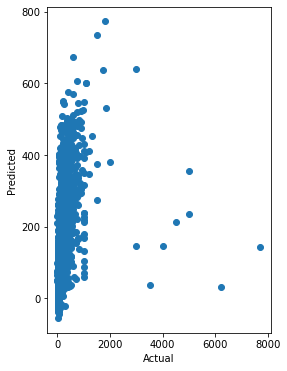

In [62]:
plt.figure(figsize=(4, 6))
plt.scatter(y_test, y_pred, marker='o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show

In [57]:
pred_y_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:10]

,Actual value,Predicted value,Difference
59501,45.0,39.887954,5.112046
9536,155.0,89.849644,65.150356
66991,80.0,83.096877,-3.096877
53936,78.0,83.239556,-5.239556
54773,65.0,94.542834,-29.542834
62184,22.0,62.724700,-40.724700
25601,55.0,52.692523,2.307477
2224,30.0,23.131782,6.868218
61567,121.0,256.643726,-135.643726
59540,44.0,101.065712,-57.065712


## 5. Big data and storage issues discussion

In our case our dataset for AirBNB listings in London is not that big and therefore we do not really have the need for distributed databases. If our business was not only London based and we would have to mimic AirBnB’s database for all cities we would probably run into issues regarding the database size. Therefore it will be useful to use tools such as Hadoop or Spark. Not only is it a problem to store the data, we also need to perform some operations on it when data is added or updated. Therefore we need to use some tools to handle this.

Right now we are thinking in terms of the listings data we got from AirBNB, but there is much more data than just this. Therefore if we got more data for example the reviews for each listing which we could do sentiment analysis on, we would be even more in need of Hadoop or Spark. These tools are smart because it moves the process to the data, instead of moving the data to the process. We need to calculate the average review score for a listing when a review is added. This is a small process in itself to calculate the average of some numbers, but if we had to get the data and calculate it, then it's a longer process. Therefore we would use Hadoop or Spark for our data. This is only in the case that we had to update data along the way and have the data for more cities. We would need these types of tools when we approach large datasets.

## 6. Ethical and legal issues

#### 6.1 Legality and Ethicality of dataset usage

We do not foresee any legal issues regarding the usage of the listing data. This is data that AirBnb provided for public and commercial usage. If this data were for example secretly taken from their API, then there would be legal ramifications as it is AirBnB’s data. However this is not the case, as we mention above, all the data we are using is public on the AirBnB web. As to the ethicality of the dataset usage, we not see any potential points of contention either. Airbnb is fairly successful in obfuscating host personal data. We as a company do not have access to their exact addresses, banking informations etc. Therefore data that we are using cannot be easily misused.

#### 6.2 Legality and Ethicality of FairBnb’s business case

Regarding the legality of our business case, we do expect any legal problems. Our business case is using the data provided by AirBnb under the Creative commons license and analyze it to advise hosts how to make their listings more profitable, either by changing the price, or focusing on other changeable attributes, such as review scores etc. As this type of service is perfectly legal and also in accordance with AirBnB’s Terms and Conditions, as mentioned above, we do not see any legal issues.

When talking about ethical issues, we believe that our service will actually bring apartment prices down, as it might increase the competition between hosts. Therefore by helping the host to make as much money as they can get from each reservation while still giving a fair price. This will have the consequence of lowering the prices for all guests. It is of course obvious that a apartment in the center of London is always going to be more expensive than one in the suburbs, but our goal is that the central apartment should not be overpriced just because of the location. As such we hope that our service would be a net positive for the AirBnB community.